In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [4]:
# hbar = m = omega = 1

def dx(r,theta):
    return np.sqrt(0.5*(np.cosh(2*r) - np.sinh(2*r) * np.cos(theta)))

def dp(r,theta):
    return np.sqrt(0.5*(np.cosh(2*r) + np.sinh(2*r) * np.cos(theta)))

r = 2
theta = np.linspace(0, 2*np.pi, 200)
x = dx(r,theta)
p = dp(r,theta)

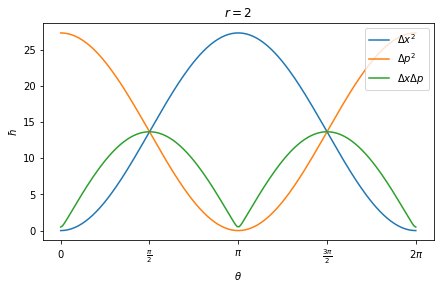

In [7]:
fig,ax = plt.subplots(1,figsize = [7,4])
ax.plot(theta,x**2 ,label='$\Delta x^2$')
ax.plot(theta,p**2 ,label='$\Delta p^2$')
ax.plot(theta,x*p , label = '$\Delta x\Delta p$')
ax.legend(loc = 'upper right')
x_ticks = np.linspace(0,2*np.pi, 5)
ax.set_xticks(x_ticks)
ax.set_xticklabels([r'$0$',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',
                    r'$2\pi$'])
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\hbar$')
ax.set_title(r'$r = {}$'.format(r))
plt.show()

In [11]:
hbar = omega = m = c = tau = 1

def total_noise_min(r):
    return np.sqrt(np.exp(2*r)*hbar**2 * tau**2 * omega**2/(m**2 * c**2) + np.exp(-2*r) *c**2/(4*omega**2))
    
    

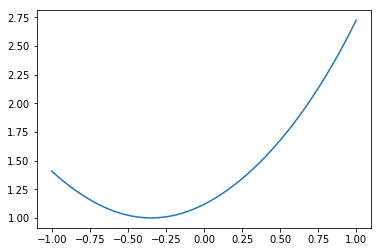

In [34]:
r = np.linspace(-1,1,200)
zmin = total_noise_min(r)
plt.plot(r,zmin)

plt.show()
opt_r = r[np.argmin(zmin)]

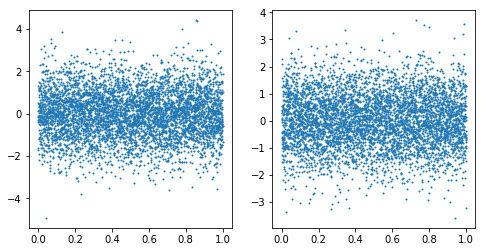

In [38]:
N = 5000
t = np.linspace(0,1,N)

f = 5

sig_strength = 0.01
r = 0
sig1 = sig_strength*np.sin(f*2*np.pi*t) + np.random.normal(0, total_noise_min(r), size = N)
r = opt_r
sig2 = sig_strength*np.sin(f*2*np.pi*t) + np.random.normal(0, total_noise_min(r), size = N)

fig,[ax1,ax2] = plt.subplots(1,2, figsize=[8,4])
ax1.plot(t,sig1,'o', markersize = 1)
ax2.plot(t,sig2,'o', markersize = 1)

In [135]:
def errN2(alpha,r,phi):
    return (alpha**2 * np.cos(phi)**4 + 2*np.sinh(r)**2*np.cosh(r)**2*np.sin(phi)**4 
            + (alpha**2 * np.exp(-2*r) + np.sinh(r)**2) *np.cos(phi)**2 * np.sin(phi)**2)

def errN2(alpha,r,phi):
    return (alpha**2 * np.cos(phi)**4 + 2*np.sinh(r)**2*np.cosh(r)**2*np.sin(phi)**4 
            + (alpha**2 * np.exp(-2*r) + np.sinh(r)**2) *np.cos(phi)**2 * np.sin(phi)**2)
    
def errzpc(args):
    alpha, r, phi = args
    return c/omega *errN2(alpha, r, phi) / (2*(alpha - np.sinh(r)**2) *np.cos(phi)*np.sin(phi)) 

alpha = 1
r = 0.03
phi = np.pi/2 * (1 + 0.6)
print(np.cos(phi))
errzpc([alpha, r, phi])

-0.809016994375


-0.67539292728319711

In [60]:
from scipy.optimize import minimize

minimize(errzpc, x0 = [1,0,np.pi/2])

      fun: 3.061616997868383e-17
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([  3.06161697e-17,   2.43354430e+08,  -5.00000000e-01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 474
      nit: 0
     njev: 94
   status: 2
  success: False
        x: array([ 1.        ,  0.        ,  1.57079633])